General comments:
    
- 1 point deducted for every function without a docsting
- Inefficient methods will have a (potentially large) deduction
- If a solution is not attempted, it will get 0 points
- Make sure to read questions carefully and answer the actual question

**1**. (20 points)

Euclid's algorithm for finding the greatest common divisor of two numbers is

```python
gcd(a, 0) = a
gcd(a, b) = gcd(b, a modulo b)
```

1. Write a function to find the greatest common divisor in Python  (8 points)
2. What is the greatest common divisor of 17384 and 1928? (2 points)
3. Write a function to calculate the least common multiple (8 points)
4. What is the least common multiple of 17384 and 1928? (2 points)

In [1]:
def gcd(a, b):
    """Greatest common divsior."""

    if b == 0:
        return a
    else:
        return gcd(b, a % b)

In [2]:
gcd(17384, 1928)

8

In [3]:
def lcm(a, b):
    """Least common multiple."""
    
    d = gcd(a, b)
    return a * (b // d)

In [4]:
lcm(17384, 1928)

4189544

**2**.(20 points)

Consider the following system of equations:

$$\begin{align*}
2x_1& - x_2&    +x_x    &=& 6\\
-x_1& +2x_2& -  x_3 &=& 2\\
 x_1   &  -x_2& + x_3 &=& 1
\end{align*}$$

1. Consider the system in matrix form $Ax=b$ and define $A$, $b$ in numpy. (5 points)
2. Show that $A$ is positive-definite (5 points)
3. Use the appropriate matrix decomposition function in numpy and back-substitution to solve the system (10 points)

In [5]:
import numpy as np
import scipy.linalg as la

In [6]:
A = np.array([
    [2, -1, 1],
    [-1, 2, -1],
    [1, -1, 1]
])

In [7]:
b = np.array([6,2,1]).reshape(-1,1)

In [8]:
la.eigvalsh(A)

array([0.26794919, 1.        , 3.73205081])

Since all eigenvalues are positive, $A$ is positive definite.

In [9]:
C = la.cholesky(A, lower=True)
y = la.solve_triangular(C, b, lower=True)
x = la.solve_triangular(C.T, y, lower=False)

In [10]:
x

array([[ 5.],
       [ 3.],
       [-1.]])

In [11]:
A @ x

array([[6.],
       [2.],
       [1.]])

**Alternative**

In [12]:
la.cho_solve(la.cho_factor(A), b)

array([[ 5.],
       [ 3.],
       [-1.]])

**3**. (20 points)

You are given the following DNA sequence in FASTA format.

```python
dna = '''> A simulated DNA sequence.
TTAGGCAGTAACCCCGCGATAGGTAGAGCACGCAATCGTCAAGGCGTGCGGTAGGGCTTCCGTGTCTTACCCAAAGAAAC
GACGTAACGTTCCCCGGGCGGTTAAACCAAATCCACTTCACCAACGGCATAACGCGAAGCCCAAACTAAATCGCGCTCGA
GCGGACGCACATTCGCTAGGCTGTGTAGGGGCAGTCTCCGTTAAGGACGATTACCACGTGATGGTAGTTCGCAACATTGG
ACTGTCGGGAATTCCCGAAGGCACTTAAGCGGAGTCTTAGCGTACAGTAACGCAGTCCCGCGTGAACGACTGACAGATGA
'''
```

1. Remove the comment line and combine the 4 lines of nucleotide symbols into a single string (4 points)
2. Construct an empirical Markov transition matrix for the transition probabilities from any nucleotide to any other nucleotide from this string (8 points)
3. Find the steady state distribution of the Markov chain by using the eigendecomposition of the transition matrix  (8 points)

In [13]:
dna = '''> A simulated DNA sequence.
TTAGGCAGTAACCCCGCGATAGGTAGAGCACGCAATCGTCAAGGCGTGCGGTAGGGCTTCCGTGTCTTACCCAAAGAAAC
GACGTAACGTTCCCCGGGCGGTTAAACCAAATCCACTTCACCAACGGCATAACGCGAAGCCCAAACTAAATCGCGCTCGA
GCGGACGCACATTCGCTAGGCTGTGTAGGGGCAGTCTCCGTTAAGGACGATTACCACGTGATGGTAGTTCGCAACATTGG
ACTGTCGGGAATTCCCGAAGGCACTTAAGCGGAGTCTTAGCGTACAGTAACGCAGTCCCGCGTGAACGACTGACAGATGA'
'''

In [14]:
seq = ''.join(dna.strip().split('\n')[1:])

In [15]:
from collections import Counter
pairs = zip(seq, seq[1:])
c = Counter(pairs)

In [16]:
M = np.zeros((4,4))
for i, x in enumerate('ACTG'):
    for j, y in enumerate('ACTG'):
        M[i, j] = c[(x, y)]

In [17]:
M

array([[26., 25., 11., 22.],
       [21., 20., 12., 33.],
       [19., 17., 14., 11.],
       [19., 24., 23., 22.]])

In [18]:
M = M/M.sum(axis=1)[:, None]

In [19]:
M

array([[0.30952381, 0.29761905, 0.13095238, 0.26190476],
       [0.24418605, 0.23255814, 0.13953488, 0.38372093],
       [0.31147541, 0.27868852, 0.2295082 , 0.18032787],
       [0.21590909, 0.27272727, 0.26136364, 0.25      ]])

In [20]:
e, v = la.eig(M.T)

In [21]:
e

array([ 1.        +0.j       ,  0.03786645+0.0984321j,
        0.03786645-0.0984321j, -0.05414276+0.j       ])

In [22]:
v = np.real_if_close(v[:, 0])

In [23]:
p = v/v.sum()

In [24]:
p

array([0.26642087, 0.26964692, 0.18778658, 0.27614562])

In [25]:
p @ M

array([0.26642087, 0.26964692, 0.18778658, 0.27614562])

**4**. (20 points)

You are given the following set of data to fit a quadratic polynomial to

```python
x = np.arange(10)
y = np.array([  1.58873597,   7.55101533,  10.71372171,   7.90123225,
                -2.05877605, -12.40257359, -28.64568712, -46.39822281,
                -68.15488905, -97.16032044])
```

- Find the least squares solution by using the normal equations $A^T A \hat{x} = A^T y$. (5 points)

- Write your own **gradient descent** optimization function to find the least squares solution for the coefficients $\beta$ of a quadratic polynomial. Do **not** use a gradient descent algorithm from a package such as `scipy-optimize` or `scikit-learn`.  You can use a simple for loop - start with the parameters `beta = np.zeros(3)` with a learning rate $\alpha = 0.0001$ and run for 100000 iterations. (15 points)

In [26]:
x = np.arange(10)
y = np.array([  1.58873597,   7.55101533,  10.71372171,   7.90123225,
                -2.05877605, -12.40257359, -28.64568712, -46.39822281,
                -68.15488905, -97.16032044])

In [27]:
A = np.c_[np.ones(len(x)), x, x**2]

In [28]:
betas = la.solve(A.T @ A, A.T @ y)
betas

array([ 2.55079998,  7.31478229, -2.04118936])

In [29]:
def f(x, y, betas):
    """Cost function"""
    
    return betas[0] + betas[1]*x + betas[2]*x**2 - y

In [30]:
def grad(x, y, betas):
    """Gradient."""
    
    A = np.c_[np.ones(len(x)), x, x**2]
    
    return A.T @ A @ betas - A.T @ y

In [31]:
def gd(x, betas, grad, alpha=0.0001, max_iter=100000):
    """Gradient descent."""
    
    for i in range(max_iter):
        betas = betas - alpha * grad(x, y, betas)
    return betas

In [32]:
betas = gd(x, betas, grad)

In [33]:
betas

array([ 2.55079998,  7.31478229, -2.04118936])

**5**. (20 points)

A milkmaid is at point A and needs to get to point B. However, she also needs to fill a pail of water from the river en route from A to B. The equation of the river's path is shown in the figure below. What is the minimum distance she has to travel to do this?

1. Solve using `scipy.optimize` and constrained minimization (15 points)
2. Plot the solution (5 point)

![Milkmaid problem](data/milkmaid.png)

Hint: There is a local and a global optimum for this problem.

In [34]:
import scipy.optimize as opt

In [35]:
def f(x, A, B):
    """Distance between two points"""
    
    return la.norm(x-A) + la.norm(x-B)

def g(x):
    """Equation of stream."""

    return 10/(1+x)

A = np.array([2,8])
B = np.array([8,4])
cons = {'type': 'eq', 'fun': lambda x: x[1] - g(x[0])}

ms = [opt.minimize(f, [x0, g(x0)], args=(A, B), constraints=cons) for x0 in range(0, 11)]
m = min(ms, key=lambda res: res.fun)

print("Shortest distance", m.fun)

Shortest distance 9.963398299572699


In [36]:
%matplotlib inline

import matplotlib.pyplot as plt

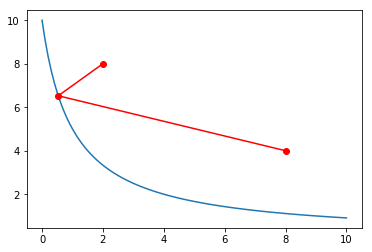

In [37]:
xp = np.linspace(0, 10, 100)
plt.plot(xp, g(xp))
plt.plot([A[0], m.x[0], B[0]], [A[1], m.x[1], B[1]], '-o', c='red')
pass